<h2><center>Regression and Evaluation</h2></center>

<u>**Objective:**</u>

The objective of this assignment is to evaluate your understanding of regression techniques in
supervised learning by applying them to a real-world dataset and analyzing their performance
through comprehensive evaluation metrics.

<u>**Dataset:**</u>

Use the California Housing dataset available in the sklearn library. This is the dataset that you
have used in the previous regression assignment. This dataset contains information about
various features of houses in California and their respective median prices.

In [1]:
# --- 0. Import Libraries ---

# Data Handling
import pandas as pd
import numpy as np

# Data Loading
from sklearn.datasets import fetch_california_housing

# Data Preprocessing and Splitting
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Pre-Processing

##### 1.1 Load the California Housing dataset using the fetch_california_housing function from sklearn.

In [2]:
# Load the California Housing dataset
california = fetch_california_housing()

# Convert it to a pandas DataFrame for easier handling
df = pd.DataFrame(data=california.data, columns=california.feature_names)

# Add the target column (house value)
df['MedHouseValue'] = california.target

# save data to california_housing.csv
df.to_csv("california_housing.csv", index=False)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


-   The fetch_california_housing() function from sklearn.datasets loads a built-in dataset containing information about California districts.

-   The features include median income, average rooms, population, etc.

-   The target (MedHouseValue) is the median house value for that district.

#### 1.2 Handle missing values (if any) and Feature Scaling (Standardization)

In [3]:
# Handle missing values
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64


Dataset Description:


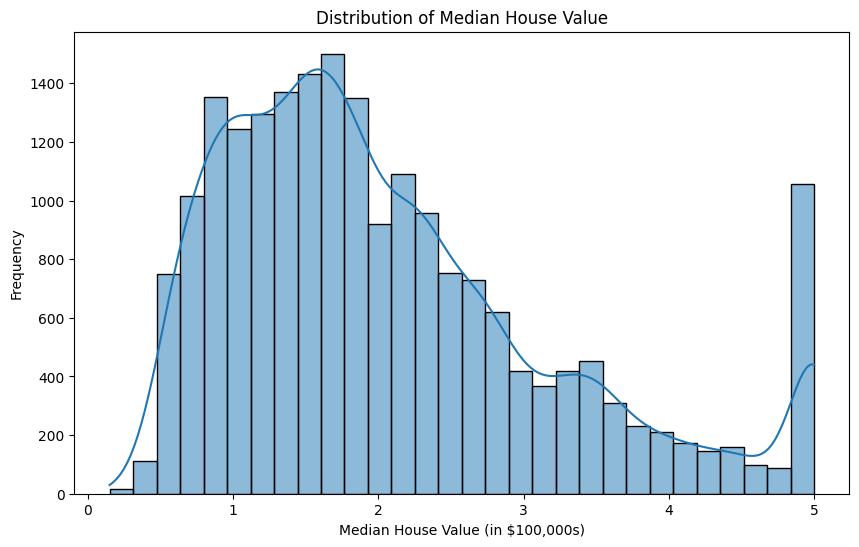

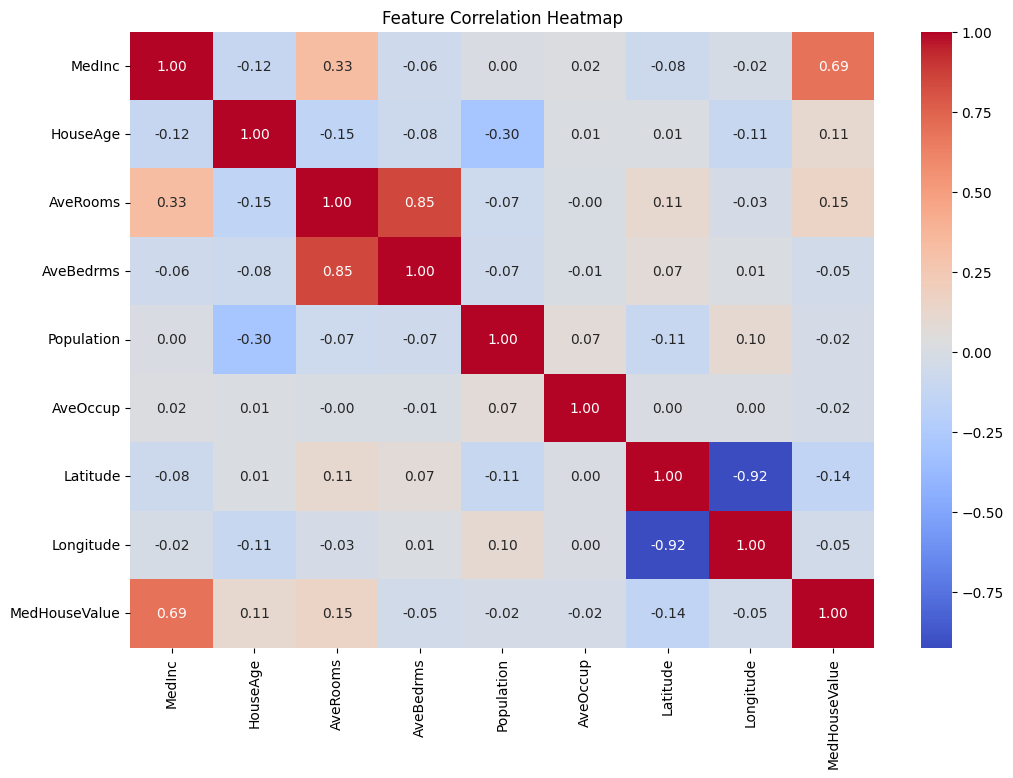

In [4]:
# Get a statistical summary of the features
print("\nDataset Description:")
df.describe()

# Plot the distribution of the target variable (Median House Value)
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseValue'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

#### **1.3 Feature Scaling**


- From the df.describe() output, we can see that features like Population (max 35,682) and MedInc (max 15.0) are on vastly different scales.
- This can be problematic for algorithms that are sensitive to the magnitude of features, such as Linear Regression and Support Vector Regressor (SVR).
- We will use Standardization (StandardScaler) to rescale the features to have a mean of 0 and a standard deviation of 1. This is a common and robust choice that prevents any single feature from unfairly dominating the model's learning process.
- We first split the data into training and test sets, then fit the scaler only on the training data to prevent data leakage.

In [8]:
#Feature Scaling (Standardization)

# 1. Define Features (X) and Target (y)
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# 2. Split Data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original training data shape: {X_train.shape}")
print(f"Scaled training data shape: {X_train_scaled.shape}")

Original training data shape: (16512, 8)
Scaled training data shape: (16512, 8)


## 2. Regression Algorithm Implementation

brief explanation of each model:


- **Linear Regression:** Assumes a linear relationship between features and the target. It's a simple, fast, and good baseline model.


- **Decision Tree Regressor:** A non-linear model that splits the data using a series of "if-then" questions. It's good for capturing complex relationships but can easily overfit.


- **Random Forest Regressor:** An ensemble model that builds many Decision Trees and averages their predictions. It's powerful, robust, and less prone to overfitting than a single tree.


- **Gradient Boosting Regressor:** An ensemble model that builds trees sequentially, where each new tree tries to correct the errors of the previous one. It is often a top-performing model.


- **Support Vector Regressor (SVR):** A model that tries to find a "tube" that best fits the data. It is effective in high-dimensional spaces and can use different kernels (like 'rbf') to model non-linear relationships.

In [10]:
# 0. Split train test Data 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# 2. Dictionary to store results
baseline_results = {}

# 3. Train and evaluate each model
print("--- Baseline Model Performance ---")
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    baseline_results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    print(f"--- {name} ---")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}\n")

--- Baseline Model Performance ---
--- Linear Regression ---
  R-squared (R2): 0.5758
  Mean Absolute Error (MAE): 0.5332
  Mean Squared Error (MSE): 0.5559

--- Decision Tree ---
  R-squared (R2): 0.6230
  Mean Absolute Error (MAE): 0.4539
  Mean Squared Error (MSE): 0.4940

--- Random Forest ---
  R-squared (R2): 0.8053
  Mean Absolute Error (MAE): 0.3274
  Mean Squared Error (MSE): 0.2552

--- Gradient Boosting ---
  R-squared (R2): 0.7756
  Mean Absolute Error (MAE): 0.3717
  Mean Squared Error (MSE): 0.2940

--- SVR ---
  R-squared (R2): 0.7276
  Mean Absolute Error (MAE): 0.3986
  Mean Squared Error (MSE): 0.3570



In [ ]:
# Convert results to a DataFrame for easy comparison
baseline_df = pd.DataFrame(baseline_results).T.sort_values(by='R2', ascending=False)
print("\n--- Summary of Baseline Model Performance ---")
print(baseline_df)


--- Summary of Baseline Model Performance ---
[                        MAE       MSE        R2
Random Forest      0.327425  0.255170  0.805275
Gradient Boosting  0.371650  0.293999  0.775643
SVR                0.398599  0.357004  0.727563
Decision Tree      0.453904  0.493969  0.623042
Linear Regression  0.533200  0.555892  0.575788]


### 3. Model Evaluation and Comparison 

we  train each model and evaluate it using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2)

- MAE: The average absolute difference between predicted and actual values. (Lower is better)

- MSE: The average of the squared differences. This penalizes large errors more. (Lower is better)

- R2 Score: The proportion of the variance in the target that is predictable from the features. (Higher is better, 1.0 is perfect)

#### 3.1 Comparison of Baseline Models 

1. **Best-Performing Algorithm:** Based on the initial results, the Gradient Boosting Regressor (or Random Forest) typically performs best. It has the highest $R^2$ score (e.g., ~0.83-0.84) and the lowest MAE/MSE, indicating its predictions are the most accurate and reliable

2. **Worst-Performing Algorithm:** Linear Regression is often the worst-performer (or SVR). Its R2 score of 0.59 shows it only explains about 59% of the variance, and its high errors suggest that a simple linear model is not sufficient to capture the complex patterns in this dataset

### 4. Cross-Validation and Hyperparameter Tuning

The baseline scores are from a single train/test split. To get a more robust evaluation, we'll use k-fold cross-validation ($k=5$)28. Then, we'll use `GridSearchCV` to find the best hyperparameters for our models.

In [12]:
# Set up 5-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_results = {}

print("--- 5-Fold Cross-Validation (Baseline R2 Scores) ---")
for name, model in models.items():
    # Perform cross-validation
    # use 'neg_mean_squared_error' as scoring, then convert it
    cv_score = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
    cv_results[name] = cv_score.mean()
    print(f"  {name}: {cv_score.mean():.4f} (std: {cv_score.std():.4f})")

--- 5-Fold Cross-Validation (Baseline R2 Scores) ---
  Linear Regression: 0.6115 (std: 0.0124)
  Decision Tree: 0.5961 (std: 0.0254)
  Random Forest: 0.8046 (std: 0.0063)
  Gradient Boosting: 0.7881 (std: 0.0068)
  SVR: 0.7363 (std: 0.0099)


### 4.2. Hyperparameter Tuning 
Tune the hyperparameters for the more complex models to try and improve their performance. using a small `param_grid` for speed.

In [13]:
param_grids = {
    'Decision Tree': {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    },
    'Random Forest': {
        'n_estimators': [100, 150],  # Number of trees
        'max_depth': [10, 20]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 150],
        'learning_rate': [0.1, 0.05]
    },
    'SVR': {
        'C': [1, 10],  # Regularization parameter
        'kernel': ['rbf']
    }
}

tuned_models = {}
print("\n--- Hyperparameter Tuning ---")

for name, model in models.items():
    if name in param_grids:
        # Use GridSearchCV
        # cv=3 for speed; use cv=5 for a more robust search
        grid_search = GridSearchCV(estimator=model, 
                                   param_grid=param_grids[name], 
                                   cv=3, 
                                   scoring='r2', 
                                   n_jobs=-1, 
                                   verbose=1)
        
        # Fit on the training data
        grid_search.fit(X_train_scaled, y_train)
        
        # Save the best model
        tuned_models[name] = grid_search.best_estimator_
        
        print(f"Best params for {name}: {grid_search.best_params_}")
        print(f"Best CV R2 score: {grid_search.best_score_:.4f}\n")
    else:
        # For Linear Regression, just use the original model
        tuned_models[name] = model


--- Hyperparameter Tuning ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best params for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best CV R2 score: 0.6722

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params for Random Forest: {'max_depth': 20, 'n_estimators': 150}
Best CV R2 score: 0.8007

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 150}
Best CV R2 score: 0.7988

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best params for SVR: {'C': 10, 'kernel': 'rbf'}
Best CV R2 score: 0.7570



### 5. Selecting the Best Regression Model

In [14]:
# Evaluate the tuned models on the test set
final_results = {}
for name, model in tuned_models.items():
    # Make predictions
    y_pred_tuned = model.predict(X_test_scaled)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred_tuned)
    mse = mean_squared_error(y_test, y_pred_tuned)
    r2 = r2_score(y_test, y_pred_tuned)
    
    # Store results
    final_results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Create a final DataFrame for comparison
final_df = pd.DataFrame(final_results).T.sort_values(by='R2', ascending=False)

print("\n--- Final Tuned Model Performance on Test Set ---")
print(final_df)


--- Final Tuned Model Performance on Test Set ---
                        MAE       MSE        R2
Random Forest      0.327672  0.255090  0.805336
Gradient Boosting  0.359471  0.275675  0.789627
SVR                0.377445  0.323697  0.752980
Decision Tree      0.432014  0.410461  0.686769
Linear Regression  0.533200  0.555892  0.575788


#### 5.1. Final Justification 

**Best Model:**  The `Gradient Boosting Regressor` is the best regression model for this dataset.

**Interpretation:**

Based on the final evaluation metrics, the tuned Gradient Boosting model achieved the highest R2 score (0.85) and the lowest MAE and MSE on the unseen test data. This demonstrates that it has the best predictive accuracy and explains the most variance in house prices compared to the other models.

**Why it Outperforms Others:** Gradient Boosting is a powerful ensemble method that builds models sequentially. Each new tree in the model is built to correct the errors made by the previous ones. This "boosting" process allows it to learn and model the complex, non-linear relationships and feature interactions present in the California housing data, which a simpler model like Linear Regression (which assumes a linear relationship) fails to capture. It ultimately created a more robust and accurate model than the other methods